In [25]:
from importlib import reload
import sabr  
reload(sabr)
from sabr import SABR
sabr_example = SABR('CU')
sabr_example.black_scholes()
sabr_example.sabr_calification()
sabr_example.sabr_calification(if_weight = False)

100%|██████████████████████████████████████████████████████████████████████████████| 2092/2092 [25:42<00:00,  1.36it/s]


In [1]:
from importlib import reload
import predict  
reload(predict)
from predict import _ARIMA
ARIMA_example1 = _ARIMA('first_para.xlsx')
ARIMA_example1.pre_ARIMA()
ARIMA_example2 = _ARIMA('second_para.xlsx')
ARIMA_example2.pre_ARIMA()
ARIMA_example3 = _ARIMA('first_para_noweight.xlsx')
ARIMA_example3.pre_ARIMA()
ARIMA_example4 = _ARIMA('second_para_noweight.xlsx')
ARIMA_example4.pre_ARIMA()

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:26<00:00,  1.68s/it]


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
first_para = pd.read_excel('first_para.xlsx',header=0,index_col=0) #usecols属性读取excel文件中的指定列，列号从0起始；skiprows属性跳过excel文件中指定行，行号从0起始

In [14]:
LSTM_first_para = pd.read_excel('LSTM_first_para.xlsx',header=0,index_col=0) #usecols属性读取excel文件中的指定列，列号从0起始；skiprows属性跳过excel文件中指定行，行号从0起始
LSTM_second_para = pd.read_excel('LSTM_second_para.xlsx',header=0,index_col=0) #usecols属性读取excel文件中的指定列，列号从0起始；skiprows属性跳过excel文件中指定行，行号从0起始
LSTM_first_para_noweight = pd.read_excel('LSTM_first_para_noweight.xlsx',header=0,index_col=0) #usecols属性读取excel文件中的指定列，列号从0起始；skiprows属性跳过excel文件中指定行，行号从0起始
LSTM_second_para_noweight = pd.read_excel('LSTM_second_para_noweight.xlsx',header=0,index_col=0) #usecols属性读取excel文件中的指定列，列号从0起始；skiprows属性跳过excel文件中指定行，行号从0起始
ARIMA_first_para = pd.read_excel('ARIMA_first_para.xlsx',header=0,index_col=0) #usecols属性读取excel文件中的指定列，列号从0起始；skiprows属性跳过excel文件中指定行，行号从0起始
ARIMA_second_para = pd.read_excel('ARIMA_second_para.xlsx',header=0,index_col=0) #usecols属性读取excel文件中的指定列，列号从0起始；skiprows属性跳过excel文件中指定行，行号从0起始
ARIMA_first_para_noweight = pd.read_excel('ARIMA_first_para_noweight.xlsx',header=0,index_col=0) #usecols属性读取excel文件中的指定列，列号从0起始；skiprows属性跳过excel文件中指定行，行号从0起始
ARIMA_second_para_noweight = pd.read_excel('ARIMA_second_para_noweight.xlsx',header=0,index_col=0) #usecols属性读取excel文件中的指定列，列号从0起始；skiprows属性跳过excel文件中指定行，行号从0起始

In [146]:
new_LSTM_first_para = pd.read_excel('new_LSTM_first_para.xlsx',header=0,index_col=0) #usecols属性读取excel文件中的指定列，列号从0起始；skiprows属性跳过excel文件中指定行，行号从0起始

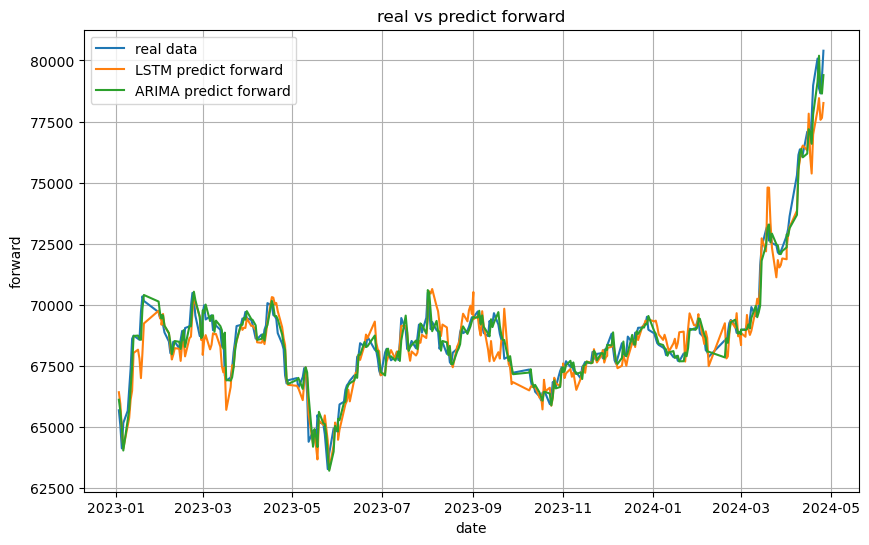

LSTM first MSE:  522602.7750101382
LSTM second MSE:  2006505.8286146973
LSTM first noweighted MSE:  666112.0223052669
LSTM second noweighted MSE:  2474689.5793067017
ARIMA first MSE:  215165.27188219552
ARIMA second MSE:  229072.915306074
ARIMA first noweighted MSE:  215165.27188219552
ARIMA second noweighted MSE:  229072.915306074


In [16]:
plt.figure(figsize=(10, 6))
plt.plot(first_para.forward[LSTM_first_para.index], label='real data')
plt.plot(LSTM_first_para.forward, label='LSTM predict forward')
plt.plot(ARIMA_first_para.forward, label='ARIMA predict forward')
plt.xlabel('date')
plt.ylabel('forward')
plt.title('real vs predict forward')
plt.legend()
plt.grid(True)
plt.savefig(f"image/LSTM vs ARIMA forward.png")
plt.show()

# 评估模型性能，例如使用均方误差(MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(first_para.forward[LSTM_first_para.index], LSTM_first_para.forward)
print('LSTM first MSE: ', mse)
mse = mean_squared_error(first_para.forward[LSTM_first_para.index], LSTM_second_para.forward)
print('LSTM second MSE: ', mse)
mse = mean_squared_error(first_para.forward[LSTM_first_para.index], LSTM_first_para_noweight.forward)
print('LSTM first noweighted MSE: ', mse)
mse = mean_squared_error(first_para.forward[LSTM_first_para.index], LSTM_second_para_noweight.forward)
print('LSTM second noweighted MSE: ', mse)
mse = mean_squared_error(first_para.forward[LSTM_first_para.index], ARIMA_first_para.forward)
print('ARIMA first MSE: ', mse)
mse = mean_squared_error(first_para.forward[LSTM_first_para.index], ARIMA_second_para.forward)
print('ARIMA second MSE: ', mse)
mse = mean_squared_error(first_para.forward[LSTM_first_para.index], ARIMA_first_para_noweight.forward)
print('ARIMA first noweighted MSE: ', mse)
mse = mean_squared_error(first_para.forward[LSTM_first_para.index], ARIMA_second_para_noweight.forward)
print('ARIMA second noweighted MSE: ', mse)

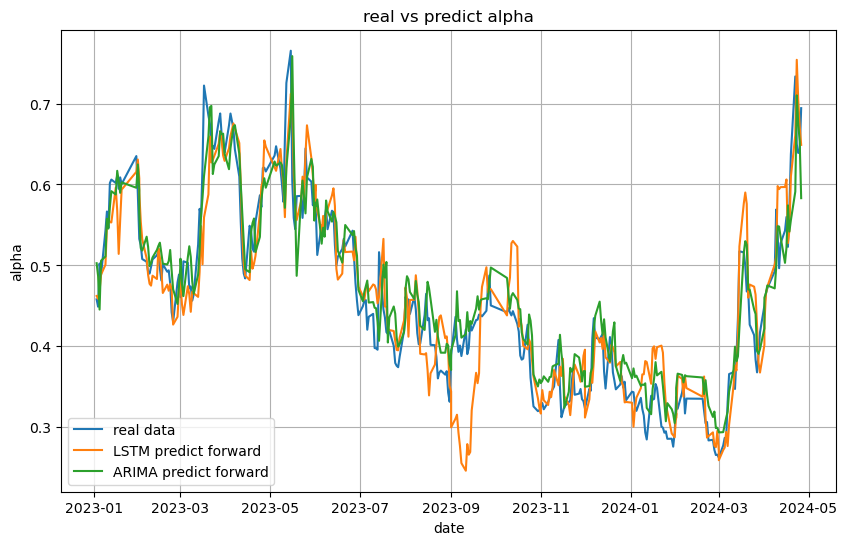

LSTM MSE:  0.002221059771364767
ARIMA MSE:  0.001541188736604399


In [17]:
plt.figure(figsize=(10, 6))
plt.plot(first_para.alpha[LSTM_first_para.index], label='real data')
plt.plot(LSTM_first_para.alpha, label='LSTM predict forward')
plt.plot(ARIMA_first_para.alpha, label='ARIMA predict forward')
plt.xlabel('date')
plt.ylabel('alpha')
plt.title('real vs predict alpha')
plt.legend()
plt.grid(True)
plt.savefig(f"image/LSTM vs ARIMA alpha.png")
plt.show()

# 评估模型性能，例如使用均方误差(MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(first_para.alpha[LSTM_first_para.index], LSTM_first_para.alpha)
print('LSTM MSE: ', mse)
mse = mean_squared_error(first_para.alpha[LSTM_first_para.index], ARIMA_first_para.alpha)
print('ARIMA MSE: ', mse)

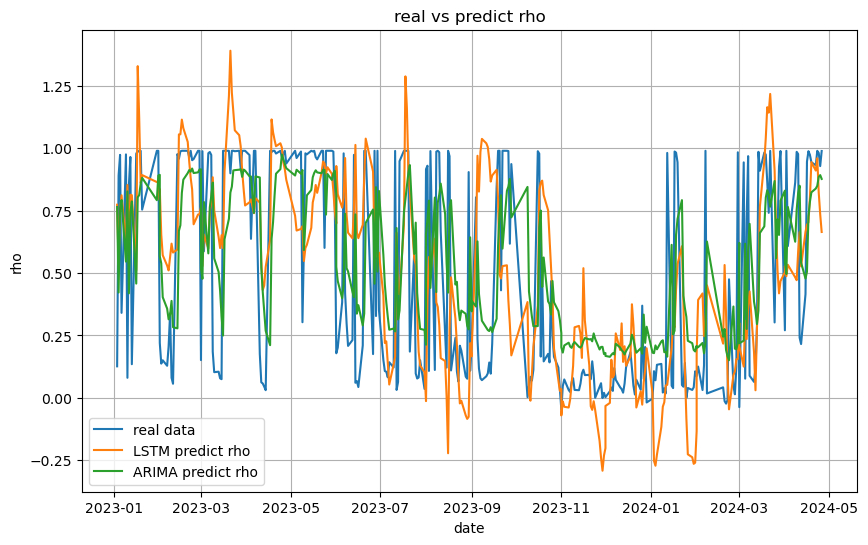

LSTM MSE:  0.14753469504582117
ARIMA MSE:  0.11335579775162628


In [18]:
plt.figure(figsize=(10, 6))
plt.plot(first_para.rho[LSTM_first_para.index], label='real data')
plt.plot(LSTM_first_para.rho, label='LSTM predict rho')
plt.plot(ARIMA_first_para.rho, label='ARIMA predict rho')
plt.xlabel('date')
plt.ylabel('rho')
plt.title('real vs predict rho')
plt.legend()
plt.grid(True)
plt.savefig(f"image/LSTM vs ARIMA rho.png")
plt.show()

# 评估模型性能，例如使用均方误差(MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(first_para.rho[LSTM_first_para.index], LSTM_first_para.rho)
print('LSTM MSE: ', mse)
mse = mean_squared_error(first_para.rho[LSTM_first_para.index], ARIMA_first_para.rho)
print('ARIMA MSE: ', mse)

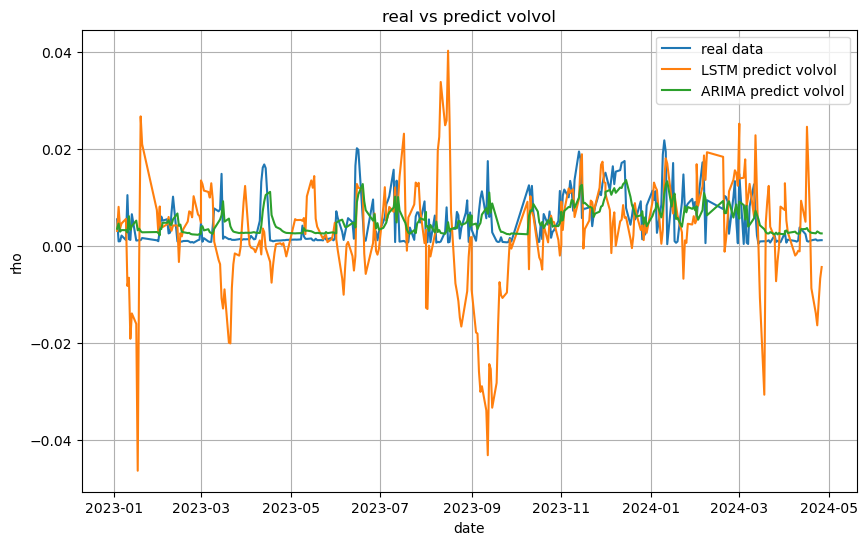

LSTM MSE:  0.00013930700534505776
ARIMA MSE:  1.6371554021117275e-05


In [19]:
plt.figure(figsize=(10, 6))
plt.plot(first_para.volvol[LSTM_first_para.index], label='real data')
plt.plot(LSTM_first_para.volvol, label='LSTM predict volvol')
plt.plot(ARIMA_first_para.volvol, label='ARIMA predict volvol')
plt.xlabel('date')
plt.ylabel('rho')
plt.title('real vs predict volvol')
plt.legend()
plt.grid(True)
plt.savefig(f"image/LSTM vs ARIMA volvol.png")
plt.show()

# 评估模型性能，例如使用均方误差(MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(first_para.volvol[LSTM_first_para.index], LSTM_first_para.volvol)
print('LSTM MSE: ', mse)
mse = mean_squared_error(first_para.volvol[LSTM_first_para.index], ARIMA_first_para.volvol)
print('ARIMA MSE: ', mse)

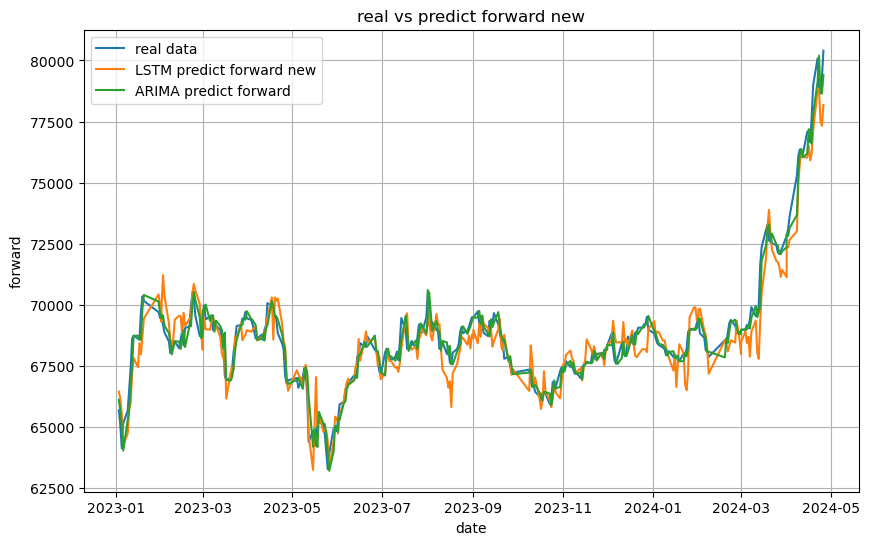

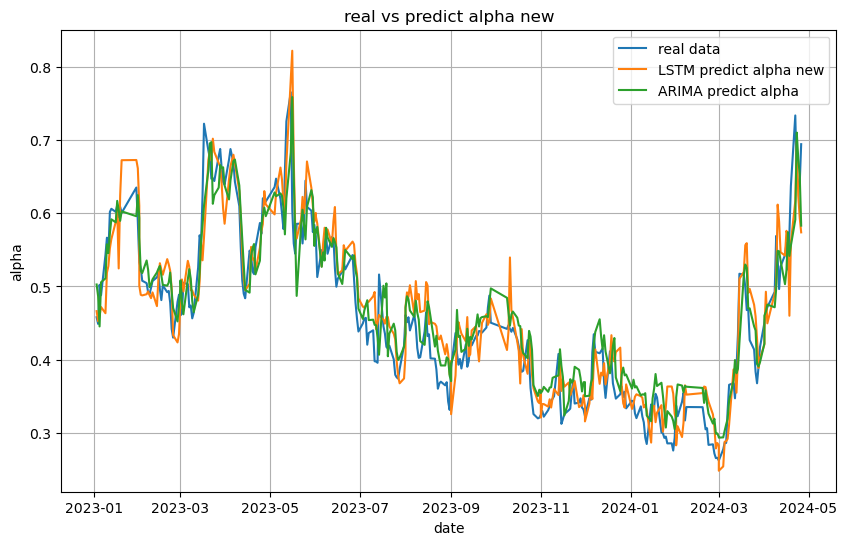

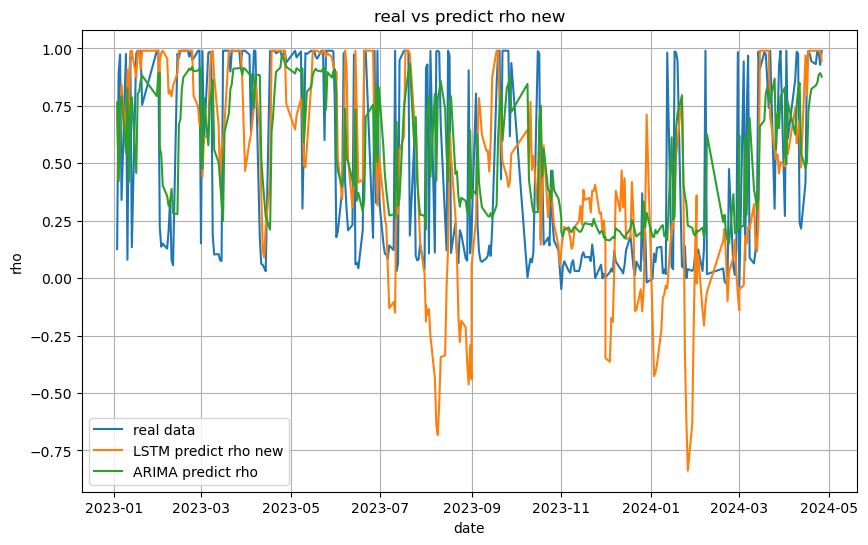

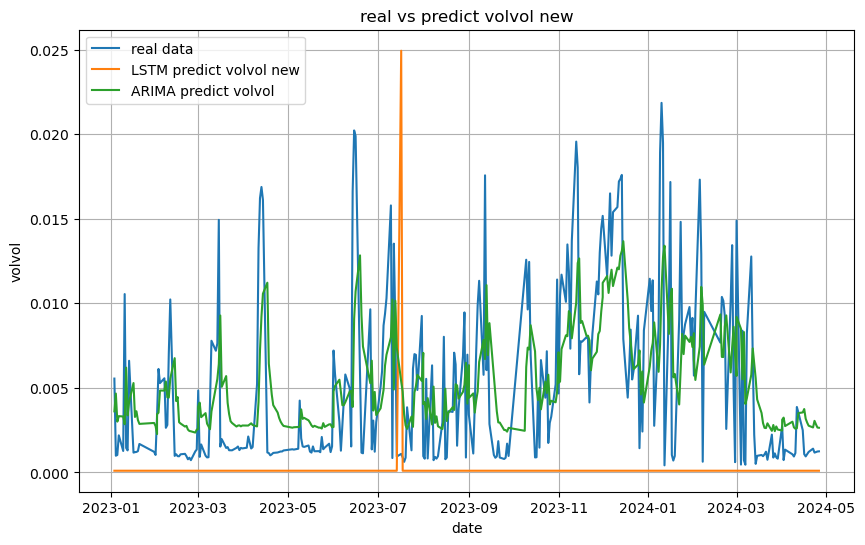

In [148]:
plt.figure(figsize=(10, 6))
plt.plot(first_para.forward[new_LSTM_first_para.index], label='real data')
plt.plot(new_LSTM_first_para.forward, label='LSTM predict forward new')
plt.plot(ARIMA_first_para.forward, label='ARIMA predict forward')
plt.xlabel('date')
plt.ylabel('forward')
plt.title('real vs predict forward new')
plt.legend()
plt.grid(True)
plt.savefig(f"image/LSTM vs ARIMA forward new.png")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(first_para.alpha[new_LSTM_first_para.index], label='real data')
plt.plot(new_LSTM_first_para.alpha, label='LSTM predict alpha new')
plt.plot(ARIMA_first_para.alpha, label='ARIMA predict alpha')
plt.xlabel('date')
plt.ylabel('alpha')
plt.title('real vs predict alpha new')
plt.legend()
plt.grid(True)
plt.savefig(f"image/LSTM vs ARIMA alpha new.png")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(first_para.rho[new_LSTM_first_para.index], label='real data')
plt.plot(new_LSTM_first_para.rho, label='LSTM predict rho new')
plt.plot(ARIMA_first_para.rho, label='ARIMA predict rho')
plt.xlabel('date')
plt.ylabel('rho')
plt.title('real vs predict rho new')
plt.legend()
plt.grid(True)
plt.savefig(f"image/LSTM vs ARIMA rho new.png")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(first_para.volvol[new_LSTM_first_para.index], label='real data')
plt.plot(new_LSTM_first_para.volvol, label='LSTM predict volvol new')
plt.plot(ARIMA_first_para.volvol, label='ARIMA predict volvol')
plt.xlabel('date')
plt.ylabel('volvol')
plt.title('real vs predict volvol new')
plt.legend()
plt.grid(True)
plt.savefig(f"image/LSTM vs ARIMA volvol new.png")
plt.show()

In [149]:
mse = mean_squared_error(first_para.forward[LSTM_first_para.index], LSTM_first_para.forward)
print('LSTM MSE: forward', mse)
mse = mean_squared_error(first_para.forward[LSTM_first_para.index], new_LSTM_first_para.forward)
print('LSTM new MSE: forward', mse)
mse = mean_squared_error(first_para.forward[LSTM_first_para.index], ARIMA_first_para.forward)
print('ARIMA MSE: forward', mse)

mse = mean_squared_error(first_para.alpha[LSTM_first_para.index], LSTM_first_para.alpha)
print('LSTM MSE: alpha', mse)
mse = mean_squared_error(first_para.alpha[LSTM_first_para.index], new_LSTM_first_para.alpha)
print('LSTM new MSE:alpha ', mse)
mse = mean_squared_error(first_para.alpha[LSTM_first_para.index], ARIMA_first_para.alpha)
print('ARIMA MSE: alpha', mse)

mse = mean_squared_error(first_para.rho[LSTM_first_para.index], LSTM_first_para.rho)
print('LSTM MSE: rho', mse)
mse = mean_squared_error(first_para.rho[LSTM_first_para.index], new_LSTM_first_para.rho)
print('LSTM new MSE: rho', mse)
mse = mean_squared_error(first_para.rho[LSTM_first_para.index], ARIMA_first_para.rho)
print('ARIMA MSE: rho', mse)

mse = mean_squared_error(first_para.volvol[LSTM_first_para.index], LSTM_first_para.volvol)
print('LSTM MSE:volvol', mse)
mse = mean_squared_error(first_para.volvol[LSTM_first_para.index], new_LSTM_first_para.volvol)
print('LSTM new MSE: volvol', mse)
mse = mean_squared_error(first_para.volvol[LSTM_first_para.index], ARIMA_first_para.volvol)
print('ARIMA MSE: volvol', mse)

LSTM MSE: forward 522602.7750101382
LSTM new MSE: forward 639499.4642080887
ARIMA MSE: forward 215165.27188219552
LSTM MSE: alpha 0.002221059771364767
LSTM new MSE:alpha  0.0019005507475293884
ARIMA MSE: alpha 0.001541188736604399
LSTM MSE: rho 0.14753469504582117
LSTM new MSE: rho 0.18988954165384844
ARIMA MSE: rho 0.11335579775162628
LSTM MSE:volvol 0.00013930700534505776
LSTM new MSE: volvol 5.44289698949356e-05
ARIMA MSE: volvol 1.6371554021117275e-05


In [48]:
class KerasMultiLSTM(object):

    def __init__(self,n_steps, input_size, output_size, cell_size, batch_size,drop_lr):
        self.n_steps = n_steps
        self.input_size = input_size
        self.output_size = output_size
        self.cell_size = cell_size # LSTM神经单元数      
        self.batch_size = batch_size # 输入batch_size大小
        self.drop_lr = drop_lr
    
    def model(self):
        
        self.model = Sequential() 
                
        # 不固定batch_size，预测时可以以1条记录进行分析
        self.model.add(LSTM(units = self.cell_size,  activation='tanh', return_sequences = True , 
                            input_shape = (self.n_steps, self.input_size))
        )
        self.model.add(Dropout(self.drop_lr))        
        # self.model.add(LSTM(units = self.cell_size, activation='tanh', return_sequences = True))
        # self.model.add(Dropout(self.drop_lr))        
        # self.model.add(LSTM(units = self.cell_size, activation='relu', return_sequences = True))
        # self.model.add(Dropout(0.1))

        #全连接，输出， add output layer
        self.model.add(TimeDistributed(Dense(self.output_size)))
        self.model.compile(metrics=['accuracy'], loss='mean_squared_error', optimizer='adam')
        self.model.summary()
    
    def train(self,x_train,y_train, epochs ,filename):
        history = self.model.fit(x_train, y_train, epochs = epochs, batch_size = self.batch_size).history
        self.model.save(filename)        
        return history

In [ ]:
def custom_activation(self, x):
    # Enforce condition 1: First output > 0
    x_0 = tf.where(x[:, :, 0] < 0, 0.001, x[:, :, 0])  # Replace negative values with a small positive value
    # Enforce condition 2: Fourth output > 0
    x_3 = tf.where(x[:, :, 3] < 0, 0.001, x[:, :, 3])  # Replace negative values with a small positive value
    # Enforce condition 3: Third output between -1 and 1
    x_2 = tf.where(x[:, :, 2] > 1, 0.99, x[:, :, 2])  # Cap values greater than 1 to 1
    x_2 = tf.where(x[:, :, 2] < -1, -0.99, x_2)  # Cap values less than -1 to -1
    return tf.stack([x_0, x[:, :, 1], x_2, x_3], axis=-1)


In [131]:
PRED_SIZE = 1 #Forecast output 1-day sequence data
TIME_STEPS = 20
BATCH_START = 0
BATCH_SIZE = 16
INPUT_SIZE = 8 # four para and ond date(maybe more thing)
OUTPUT_SIZE = 4
CELL_SIZE = 24
LR = 0.01
EPOSE = 200
class KerasMultiLSTM(object):

    def __init__(self, n_steps, input_size, output_size, cell_size, batch_size, drop_lr,x0,x2,x1_a,x1_b):
        self.n_steps = n_steps
        self.input_size = input_size
        self.output_size = output_size
        self.cell_size = cell_size
        self.batch_size = batch_size
        self.drop_lr = drop_lr
        self.x0 = x0
        self.x2 = x2
        self.x1_a = x1_a
        self.x1_b = x1_b

    def model(self):
        self.model = Sequential()
        
        # LSTM layers
        self.model.add(LSTM(units=self.cell_size, activation='tanh', return_sequences=True, input_shape=(self.n_steps, self.input_size)))
        self.model.add(Dropout(self.drop_lr))


        # Output layer with custom activation function
        self.model.add(TimeDistributed(Dense(self.output_size)))
        self.model.add(Lambda(self.custom_activation))

        self.model.compile(metrics=['accuracy'], loss='mean_squared_error', optimizer='adam')

    def train(self, x_train, y_train, epochs, filename):
        history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=self.batch_size).history
        self.model.save(filename)
        return history

    def custom_activation(self, x):
        x_0 = tf.where(x[:, :, 0] < tf.cast(self.x0, x.dtype), tf.cast(self.x0, x.dtype), x[:, :, 0])
        x_2 = tf.where(x[:, :, 2] < tf.cast(self.x2, x.dtype), tf.cast(self.x2, x.dtype), x[:, :, 2])
        x_1 = tf.where(x[:, :, 1] > tf.cast(self.x1_a, x.dtype), tf.cast(self.x1_a, x.dtype), x[:, :, 1])
        x_1 = tf.where(x[:, :, 1] < tf.cast(self.x1_b, x.dtype), tf.cast(self.x1_b, x.dtype), x_1)
        return tf.stack([x_0,x_1,x_2, x[:, :, 3]], axis=-1)

In [141]:
x2

0.49367055458600145

In [140]:
x0

-0.06250362447234617

In [138]:
x1_a

0.49

In [139]:
x1_b

-1.49

In [143]:
PRED_SIZE = 1 #Forecast output 1-day sequence data
TIME_STEPS = 20
BATCH_START = 0
BATCH_SIZE = 16
INPUT_SIZE = 8 # four para and ond date(maybe more thing)
OUTPUT_SIZE = 4
CELL_SIZE = 24
LR = 0.01
EPOSE = 50

def get_batch(train_x,train_y,TIME_STEPS = 20):
    data_len = len(train_x) - TIME_STEPS+1 # may exist some problem;only suit for pred_size = 1
    seq = []
    res = []
    for i in range(data_len):
        seq.append(train_x[i:i + TIME_STEPS])
        res.append(train_y[i:i + TIME_STEPS]) #取后5组数据
        #res.append(train_y[i:i + TIME_STEPS]) 

    seq ,res = np.array(seq),np.array(res)

    return  seq, res

def get_test_train_data(df_data):
    sc = MinMaxScaler(feature_range= (0,1))# scale
    df_data = df_data.dropna()
    training_set = sc.fit_transform(df_data[:-20])
    test_set = sc.transform(df_data[-20:])
    h1 = sc.transform(np.array([[0.001,1,0.99,0.001,1,1,1,1]]))
    x0 = h1[0,0]
    x1_a = h1[0,2]
    x2 = h1[0,3]
    h2 = sc.transform(np.array([[0.001,1,-0.99,0.001,1,1,1,1]]))
    x1_b = h2[0,2]
    total_set = np.concatenate([training_set,test_set], axis=0)
    # Since it is for multiple periods of time, the data needs to be fetched separately.
    seq, res = get_batch(total_set[:-PRED_SIZE], total_set[PRED_SIZE:,[0,2,3,4]])
    train_seq = seq[:-20]
    train_res = res[:-20]
    test_seq = seq[-20:]
    test_res = res[-20:]
    return train_seq,train_res,test_seq,test_set[:,[1,5,6,7]],sc,df_data[-20:],x0,x2,x1_a,x1_b


In [142]:
first_para

,alpha,beta,rho,volvol,forward,options_tau,option_vol,future_vol
2020-01-02,0.349387,0.5,0.983036,0.000424,49240,18,0.7503,42747
2020-01-03,0.320579,0.5,0.125338,0.007306,48940,17,1.4619,81773
2020-01-06,0.328761,0.5,-0.000098,0.013372,48680,14,1.0282,85974
2020-01-07,0.328555,0.5,0.034242,0.013029,48750,13,0.6987,57599
2020-01-08,0.315987,0.5,-0.044307,0.019350,48690,12,0.9079,82785
...,...,...,...,...,...,...,...,...
2024-04-22,0.733521,0.5,0.931855,0.001405,80080,35,43399.0000,237308
2024-04-23,0.649826,0.5,0.989851,0.001172,78860,34,43797.0000,213113
2024-04-24,0.638963,0.5,0.981216,0.001206,78650,33,44777.0000,170770
2024-04-25,0.640237,0.5,0.928641,0.001236,79320,32,55782.0000,163701


In [144]:
from sklearn.preprocessing import MinMaxScaler # scaler
from tensorflow.keras.layers import LSTM,TimeDistributed,Dense,Dropout, Lambda
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import tensorflow as tf

train_x,train_y,test_x,test_y,sc,test_df,x0,x2,x1_a,x1_b = get_test_train_data(first_para)
# 训练集需要是batch_size的倍数
k = len(train_x)%BATCH_SIZE
train_x,train_y = train_x[k:], train_y[k:]

# 创建模型实例
my_model = KerasMultiLSTM(TIME_STEPS, INPUT_SIZE, OUTPUT_SIZE, CELL_SIZE, BATCH_SIZE, LR, x0, x2, x1_a, x1_b)
# 构建模型
my_model.model()
# 训练模型
history = my_model.train(train_x, train_y, EPOSE, "first_lstm-model.keras")

# 使用训练好的模型进行预测
pred = my_model.model.predict(test_x)



# plt.plot(history['loss'], linewidth=2, label='Train')
# plt.legend(loc='upper right')
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.savefig(f"image/LSTM_learning.png")
# plt.show()

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4100 - loss: 0.2170
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7190 - loss: 0.0450
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6962 - loss: 0.0350
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7028 - loss: 0.0290
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7094 - loss: 0.0261
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7060 - loss: 0.0244
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7233 - loss: 0.0218
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7123 - loss: 0.0208
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7895 - loss: 0.0123
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7993 - loss: 0.0112
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8049 - loss: 0.0112
Epoch 12/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8135 - lo

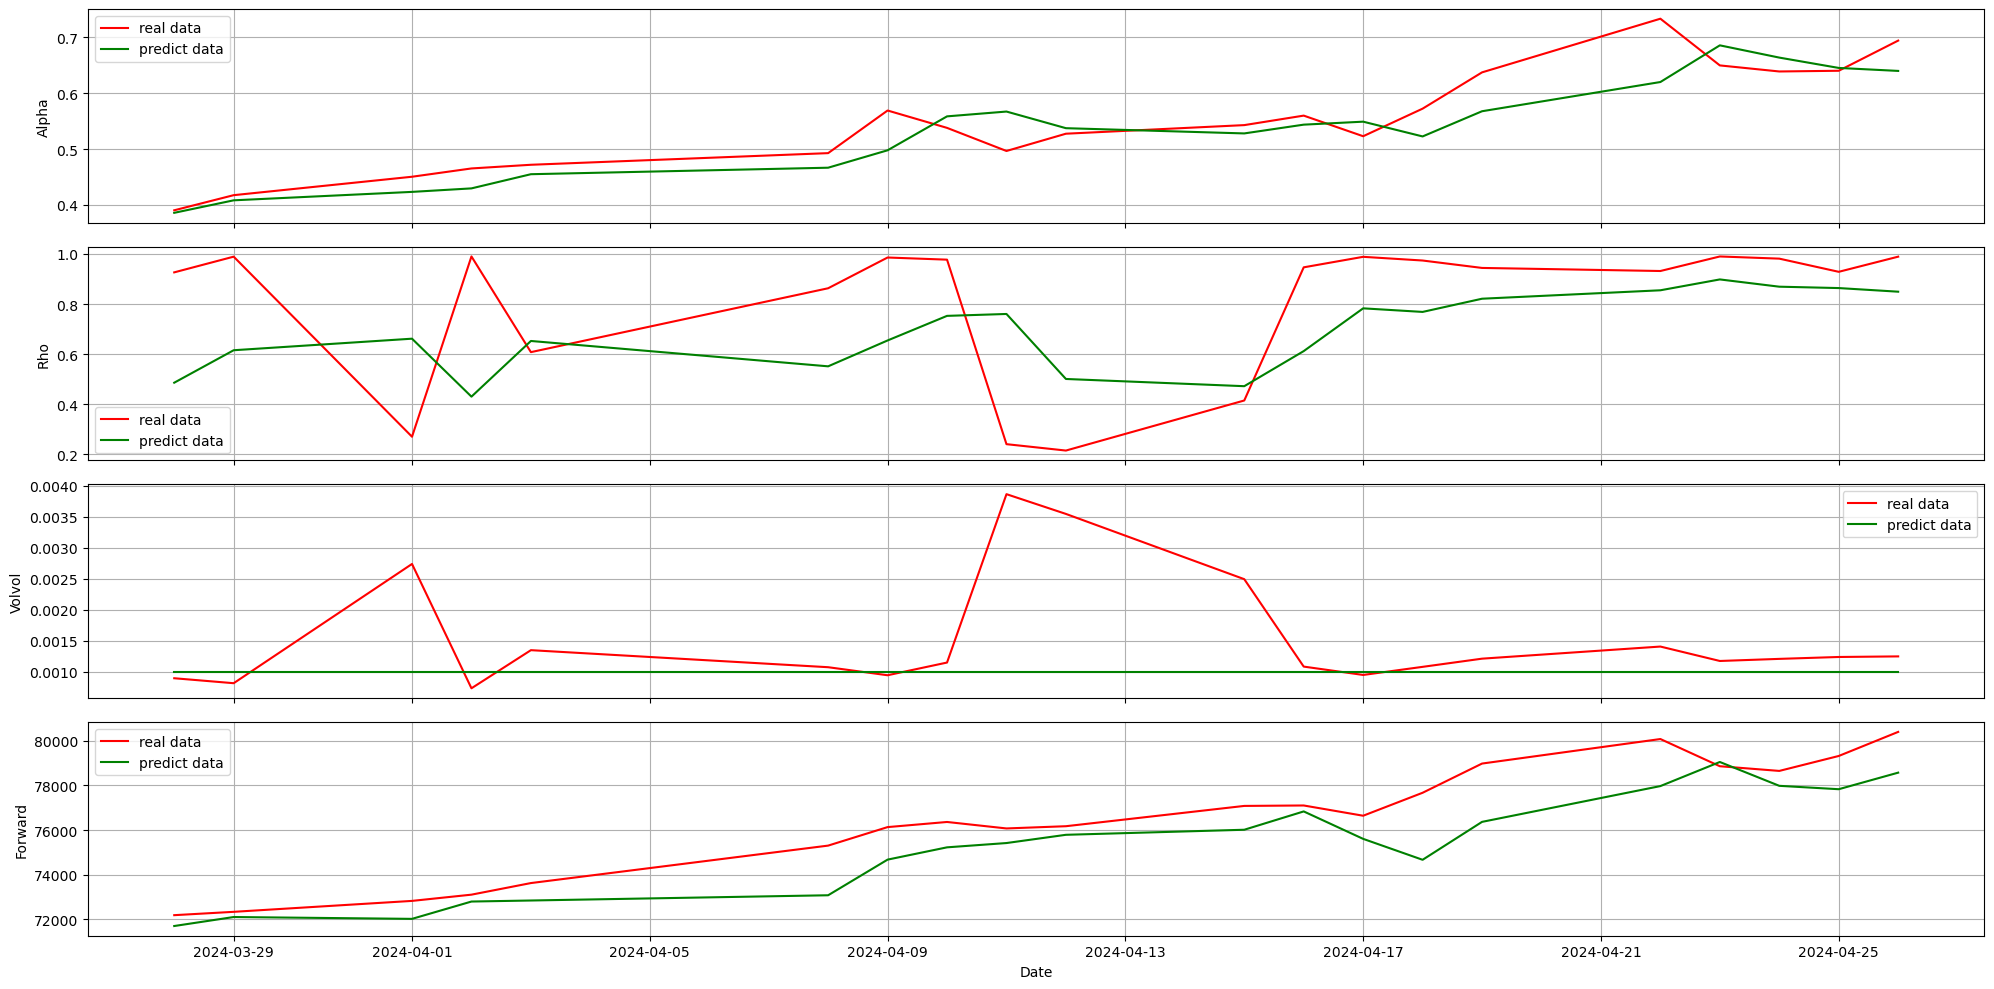

In [145]:
def get_pred_data(pred,test_y,sc):
    pred_neu = pred[:,-1,:]
    pred_neu1 = np.array([np.array([elem]) for elem in pred_neu[:,0]])
    pred_neu2 = pred_neu[:,1:]
    text_y_neu1 = np.array([np.array([elem]) for elem in test_y[:,0]])
    text_y_neu2 = test_y[:,1:]
    yy = np.concatenate((pred_neu1, text_y_neu1,pred_neu2,text_y_neu2),axis = 1)
    y=sc.inverse_transform(yy)
    return y
pred_array = get_pred_data(pred,test_y,sc)
pred_df = pd.DataFrame(pred_array,columns = test_df.columns)
pred_df.index = test_df.index

# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(20, 10), sharex=True)

# Plot alpha
axs[0].plot(first_para.alpha[-20:], label='real data', color='red')
axs[0].plot(pred_df.alpha, label='predict data', color='green')
axs[0].set_ylabel('Alpha')
axs[0].grid(True)
axs[0].legend()
# Plot rho
axs[1].plot(first_para.rho[-20:], label='real data', color='red')
axs[1].plot(pred_df.rho, label='predict data', color='green')
axs[1].set_ylabel('Rho')
axs[1].grid(True)
axs[1].legend()
# Plot volvol
axs[2].plot(first_para.volvol[-20:], label='real data', color='red')
axs[2].plot(pred_df.volvol, label='predict data', color='green')
axs[2].set_ylabel('Volvol')
axs[2].grid(True)
axs[2].legend()
# Plot volvol
axs[3].plot(first_para.forward[-20:], label='real data', color='red')
axs[3].plot(pred_df.forward, label='predict data', color='green')
axs[3].set_ylabel('Forward')
axs[3].grid(True)
axs[3].legend()

# Set common x-axis label
axs[-1].set_xlabel('Date')

# Adjust layout
plt.tight_layout()
# Show plot

plt.savefig(f"image/LSTM-real vs predict.png")
plt.show()

In [48]:
sc.inverse_transform(np.array([1,2,3,4,5,6,7,8]))

ValueError: Expected 2D array, got 1D array instead:
array=[1. 2. 3. 4. 5. 6. 7. 8.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [58]:
from importlib import reload
import predict  
reload(predict)
from predict import _ARIMA
first_forward_train = first_para.forward[:-20]
first_forward_test = first_para.forward[-20:]
example_1 = _ARIMA(first_forward_train,first_forward_test)
main_forward_fit, main_forward_predict= example_1.get_predict_data()

# ARIMA_first_forward = pd.concat([main_forward_fit, main_forward_predict],axis=0)
# ARIMA_first_forward.name = 'ARIMA_first_forward'

# example_2 = _ARIMA(second_forward_ts[date_train],second_forward_ts[date_test])
# second_forward_fit, second_forward_predict= example_2.get_predict_data()
# ARIMA_second_forward = pd.concat([second_forward_fit, second_forward_predict],axis=0)
# ARIMA_second_forward.name = 'ARIMA_second_forward'

# for name in ['alpha','rho','volvol']:
#     example_1 = _ARIMA(sabr_para_first_cleaned.loc[date_train,name],sabr_para_first_cleaned.loc[date_test,name])
#     main_forward_fit, main_forward_predict= example_1.get_predict_data()
#     ARIMA_first_forward = pd.concat([main_forward_fit, main_forward_predict],axis=0)
#     ARIMA_first_forward.name = f'ARIMA_{name}'
#     sabr_para_first_cleaned[f'ARIMA_{name}'] = ARIMA_first_forward

#     example_2 = _ARIMA(sabr_para_second.loc[date_train,name],sabr_para_second.loc[date_test,name])
#     second_forward_fit, second_forward_predict= example_2.get_predict_data()
#     ARIMA_second_forward = pd.concat([second_forward_fit, second_forward_predict],axis=0)
#     ARIMA_second_forward.name = f'ARIMA_{name}'
#     sabr_para_second[f'ARIMA_{name}'] = ARIMA_second_forward

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16051.829, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16066.546, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16050.159, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16049.852, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16065.904, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=16051.843, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=16053.848, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=16048.819, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=16050.801, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=16050.821, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=16049.092, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=16052.665, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.081 seconds


In [59]:
first_forward_train20 = first_para.forward[-40:-20]
first_forward_test = first_para.forward[-20:]
example_2 = _ARIMA(first_forward_train20,first_forward_test)
main_forward_fit, main_forward_predict20= example_2.get_predict_data()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=285.624, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=287.615, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=287.626, Time=0.01 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=283.633, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.139 seconds


In [63]:
first_forward_train60 = first_para.forward[-80:-20]
first_forward_test = first_para.forward[-20:]
example_3 = _ARIMA(first_forward_train60,first_forward_test)
main_forward_fit, main_forward_predict60= example_3.get_predict_data()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=874.107, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=870.521, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=872.205, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=872.291, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=869.517, Time=0.00 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.102 seconds


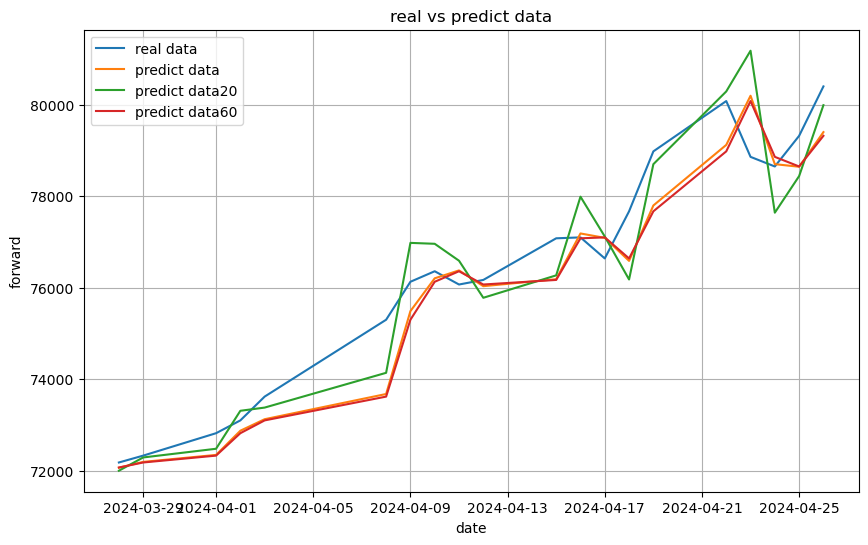

Test MSE:  573960.589941068
Test20 MSE:  723405.0000000008
Test60 MSE:  622835.0


In [64]:
plt.figure(figsize=(10, 6))
plt.plot(first_forward_test, label='real data')
plt.plot(main_forward_predict, label='predict data')
plt.plot(main_forward_predict20, label='predict data20')
plt.plot(main_forward_predict60, label='predict data60')
plt.xlabel('date')
plt.ylabel('forward')
plt.title('real vs predict data')
plt.legend()
plt.grid(True)
plt.show()

# 评估模型性能，例如使用均方误差(MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(first_forward_test, main_forward_predict)
print('Test MSE: ', mse)
mse = mean_squared_error(first_forward_test, main_forward_predict20)
print('Test20 MSE: ', mse)
mse = mean_squared_error(first_forward_test, main_forward_predict60)
print('Test60 MSE: ', mse)